In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('/home/babs/Documents/DIFACQUIM/PPI_ML'))

In [2]:
import phase1


In [3]:
from phase1.support_functions.df_management import get_data, get_random_smiles, get_positive_records, filter_positive_bits, filter_negative_bits
from phase1.support_functions.draw_molecules import get_ECFP4_bits, draw_one_fragment

In [32]:
data = get_data("dataset_ecfp6.csv")
print(data.head())

   ipp_id chembl_id                                             SMILES  \
0     4.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br   
1     7.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   
2    18.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1cccnc1Cl   
3    22.0       NaN  Nc1ccc(C(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(O)=O)c...   
4    24.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   

  library  PPI family  PPI    0    1    2    3  ...  2038  2039  2040  2041  \
0     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
1     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
2     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
3     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
4     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   

   2042  2043  2044  2045  2046  2047  
0   0.0   0.0   0.0   0.0   0.0   0.0  


/home/babs/.pyenv/versions/miniconda3-3.8-4.9.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [33]:
# bring molecule information
molecule0 = data.iloc[0]


In [34]:
#positive records for molecule0
molecule0_positive = get_positive_records(molecule0)

In [35]:
molecule0_positive[:5]

[1, 46, 57, 79, 80]

In [36]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

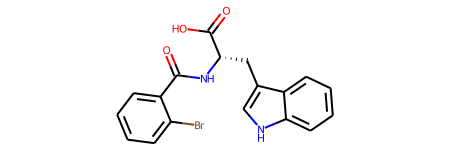

In [37]:
#Visualize molecules
mol0_draw = Chem.MolFromSmiles(molecule0.SMILES)
mol0_draw

In [38]:
# moleculule0 bits
fragments_molecule0 = get_ECFP4_bits(molecule0.SMILES)

In [42]:
fragments_molecule0[:5]

[1, 46, 57, 79, 80]

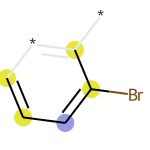

In [43]:
# draw fragments for molecule 0
draw_one_fragment(molecule0.SMILES, 57)

# filter positives

In [44]:
bits_ = [1390,]
positives_0 = filter_positive_bits(bits_, data)
positives_0

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
261,1503.0,NaN,CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CC(=O)N(Cc2ccc(...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,1650.0,NaN,COc1ccc(C2=N[C@H]([C@H](N2C(=O)N2CCNC(=O)C2)c2...,PPI,"MDM2-Like / P53, MDM2-like dimer",Yes,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,333.0,NaN,COc1ccc(CN([C@@H](C(=O)NCc2ccccc2)c2ccc3cc(OCC...,PPI,Myc / Max,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,410.0,NaN,CCCCN([C@@H](C(=O)NCc1ccccc1)c1ccc2cc(OCC(=O)O...,PPI,Myc / Max,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,571.0,NaN,COc1ccc(CN([C@@H](C(=O)NC2CCCCC2)c2ccc3cc(OCC(...,PPI,Myc / Max,Yes,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,NaN,Eflornithine,NCCCC(N)(C(F)F)C(O)=O,FDA,NaN,No,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3930,NaN,Brexpiprazole,O=C1NC2=CC(OCCCCN3CCN(CC3)C3=C4C=CSC4=CC=C3)=C...,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3999,NaN,Paritaprevir,[H][C@@]12C[C@]1(NC(=O)[C@]1([H])C[C@H](CN1C(=...,FDA,NaN,No,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4329,NaN,Copanlisib,COC1=C(OCCCN2CCOCC2)C=CC2=C1N=C(NC(=O)C1=CN=C(...,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# positives_0

In [48]:
bits_ = [202, 1160]
positives_1 = filter_positive_bits(bits_, data)
print(f"molecules : {positives_1.shape}")
print(positives_1.iloc[0][["ipp_id", "SMILES"]])

molecules : (48, 2054)
ipp_id                                         1828
SMILES    Cc1cc(cc(C)c1O)-c1nc2sc3CCCc3c2c(=O)[nH]1
Name: 427, dtype: object


# filter negatives

In [49]:
negative_0 = filter_negative_bits(["558"], data)
negative_0.head()

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,4.0,NaN,OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,NaN,OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1cccnc1Cl,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.0,NaN,Nc1ccc(C(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(O)=O)c...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
negative_1 = filter_negative_bits(["558", "1"], data)
negative_1.head()

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
6,28.0,NaN,FC(F)(F)c1c(Sc2ccccc2OCc2cccnc2)ccc(\C=C\C(=O)...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,31.0,NaN,CC(=O)N1CCN(CC1)c1cc(ccn1)-c1ccc(Sc2ccc3OCCOc3...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,43.0,NaN,FC(F)(F)c1c(Sc2ccccc2OCc2ccccn2)ccc(\C=C\C(=O)...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,NaN,CN1C(=O)N(C(=O)[C@]11CN(C[C@H]1c1ccc(cc1)C#N)c...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,73.0,NaN,CCOC(=O)[C@H]1CCCN(C1)c1ccccc1Sc1ccc(cc1C(F)(F...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# calculo de porcentajes 548
negatives = negative_0[negative_0["library"]=="PPI"].shape[0]

In [54]:
total = data[data["library"]=="PPI"].shape[0]

In [55]:
percentage = (negatives/total)
percentage

0.954647507858105